<a href="https://colab.research.google.com/github/lawrencerowland/py3plex/blob/master/stakeholder_objectives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
from py3plex.core import multinet
import networkx as nx
from py3plex.visualization.multilayer import draw_multiedges, draw_multilayer_default, hairball_plot, plt
from py3plex.visualization.colors import all_color_names,colors_default
A =None
A = multinet.multi_layer_network()

# Edges  added as lists: [n1,l1,n2,l2,w]
objectives = [["sustain_carbon", "objectives", "new_station", "objectives", 10],
          ["sustain_carbon", "objectives", "New_construction_method", "objectives", 7],
           ["faster_trains", "objectives", "new_station", "objectives", 5],]

stakeholders = [["Town_council", "stakeholders", "Train_Operator", "stakeholders", .4],
           ["Town_council", "stakeholders", "Safety_Board", "stakeholders", .1],
           ["Safety_Board", "stakeholders", "Train_manufacturer", "stakeholders", .6]]

scope = [["civil_works", "scope", "new_track", "scope", .7],
         ["in_cab_signalling", "scope", "new_track", "scope", .6],
         ["new_trains", "scope", "new_track", "scope", .7],
         ["new_trains", "scope", "in_cab_signalling", "scope", .9],
         ["telecoms", "scope", "in_cab_signalling", "scope", .9],
         ["telecoms", "scope", "new_trains", "scope", .9]]

inter_layer_edges = [["sustain_carbon", "objectives", "Town_council", "stakeholders", .6],
                     ["sustain_carbon", "objectives", "Train_manufacturer", "stakeholders", .6],
                     ["faster_trains", "objectives", "Train_manufacturer", "stakeholders", 1],
                     ["faster_trains", "objectives", "Safety_Board", "stakeholders", .8],
                     ["new_trains", "scope", "faster_trains", "objectives", .9],
                     ["civil_works", "scope", "New_construction_method", "objectives", .7],
                     ["new_track", "scope", "sustain_carbon", "objectives", .5],
                     ["civil_works", "scope", "new_station", "objectives", .6],
                     ["new_trains", "scope", "faster_trains", "objectives", .9],
                     ["new_trains", "scope", "Safety_Board", "stakeholders", .7],
                     ["new_trains", "scope", "Train_manfacturer", "stakeholders", 1],
                     ["telecoms", "scope", "Safety_Board", "stakeholders", .6],
                     ["in_cab_signalling", "scope", "Train_Operator", "stakeholders", .6],
                     ["civil_works", "scope", "Town_council", "stakeholders", .4],
                     ["new_trains", "scope", "Safety_Board", "stakeholders", .9]]

In [167]:
# specify that input is list
A.add_edges(objectives, input_type="list")
A.add_edges(stakeholders, input_type="list")
A.add_edges(scope, input_type="list")
A.add_edges(inter_layer_edges, input_type="list")

In [168]:
network_labels, graphs, multilinks = A.get_layers() 

-------------------- 
 Network splitting in progress 
 --------------------


100%|██████████| 100/100 [00:00<00:00, 6387.33it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████| 100/100 [00:00<00:00, 4181.13it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


100%|██████████| 100/100 [00:00<00:00, 5304.14it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds
Finished with layout..


In [150]:
# quick summary
print(A.summary())
A.basic_stats()
print(list(A.get_edges()))
stats_frame = core_network_statistics(A.core_network)
print(stats_frame)

{'Number of layers': 3, 'Nodes': 14, 'Edges': 27, 'Mean degree': 3.857142857142857, 'CC': 1}
-------------------- 
 Computing core stats of the network 
 --------------------
MultiDiGraph with 14 nodes and 27 edges
Number of unique node IDs: 9
[(('sustain_carbon', 'objectives'), ('new_station', 'objectives')), (('sustain_carbon', 'objectives'), ('New_construction_method', 'objectives')), (('sustain_carbon', 'objectives'), ('Town_council', 'stakeholders')), (('sustain_carbon', 'objectives'), ('Train_manufacturer', 'stakeholders')), (('faster_trains', 'objectives'), ('new_station', 'objectives')), (('faster_trains', 'objectives'), ('Train_manufacturer', 'stakeholders')), (('faster_trains', 'objectives'), ('Safety_Board', 'stakeholders')), (('Town_council', 'stakeholders'), ('Train_Operator', 'stakeholders')), (('Town_council', 'stakeholders'), ('Safety_Board', 'stakeholders')), (('Safety_Board', 'stakeholders'), ('Train_manufacturer', 'stakeholders')), (('civil_works', 'scope'), ('new_tr

-------------------- 
 Network splitting in progress 
 --------------------
Beginning parsing..


100%|██████████| 100/100 [00:00<00:00, 1663.26it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.03  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


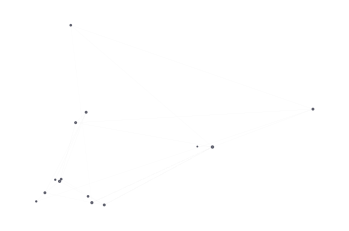

<Figure size 432x288 with 0 Axes>

In [169]:
A.visualize_network(style="hairball")
plt.show()
plt.clf()

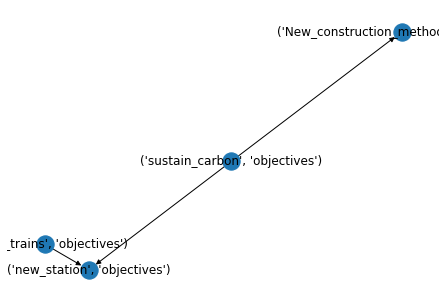

<Figure size 432x288 with 0 Axes>

In [170]:
One_layer=graphs[0] # or later, we use name networks[0]
nx.draw(One_layer,with_labels=True)
plt.show()
plt.clf()

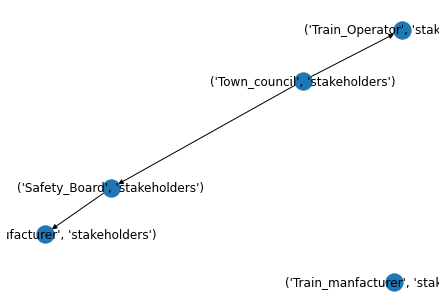

<Figure size 432x288 with 0 Axes>

In [171]:
Two_layer=graphs[1] # or networks[0]
nx.draw(Two_layer,with_labels=True)
plt.show()
plt.clf()

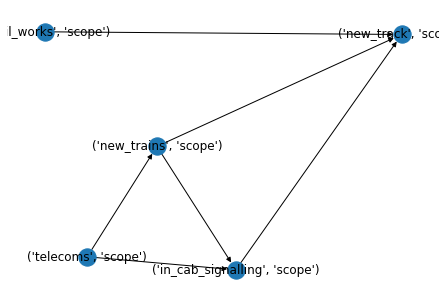

<Figure size 432x288 with 0 Axes>

In [172]:
Three_layer=graphs[2] # or networks[0]
nx.draw(Three_layer,with_labels=True)
plt.show()
plt.clf()

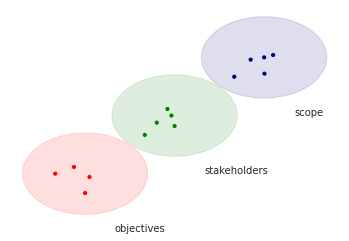

In [173]:
# show the layers 
draw_multilayer_default(graphs,
                        display=False,
                        background_shape="circle",
                        labels=network_labels)

-------------------- 
 Network splitting in progress 
 --------------------


100%|██████████| 100/100 [00:00<00:00, 4046.99it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████| 100/100 [00:00<00:00, 4724.11it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████| 100/100 [00:00<00:00, 4984.61it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds
Finished with layout..
MultiDiGraph with 4 nodes and 3 edges
MultiDiGraph with 5 nodes and 3 edges
MultiDiGraph with 5 nodes and 6 edges


100%|██████████| 1/1 [00:00<00:00, 21.97it/s]


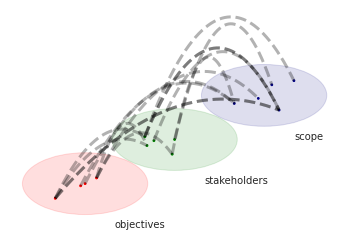

<Figure size 432x288 with 0 Axes>

In [174]:
A.visualize_network(style="diagonal",resolution=0.001,linepoints="-",linewidth=3)
plt.show()
plt.clf()
#even simpler A.visualize_network()
# You can also access individual graphical elements separately
# eg if edge_type == "refers_to":

In [175]:
A.monitor("Node looping:")
for node in A.get_nodes(data=True):
    print(node)
#can do for edges

-------------------- 
 Node looping: 
 --------------------
(('sustain_carbon', 'objectives'), {'pos': array([0.69148695, 0.69290874])})
(('new_station', 'objectives'), {'pos': array([0.42482001, 0.42604039])})
(('New_construction_method', 'objectives'), {'pos': array([0.5, 0.5])})
(('faster_trains', 'objectives'), {'pos': array([0., 0.])})
(('Town_council', 'stakeholders'), {'pos': array([1.95963621, 1.5       ])})
(('Train_Operator', 'stakeholders'), {'pos': array([2., 2.])})
(('Safety_Board', 'stakeholders'), {'pos': array([1.5       , 2.09283872])})
(('Train_manufacturer', 'stakeholders'), {'pos': array([1.53808305, 1.79400939])})
(('civil_works', 'scope'), {'pos': array([3.        , 3.22488851])})
(('new_track', 'scope'), {'pos': array([3.4023657 , 3.39780643])})
(('in_cab_signalling', 'scope'), {'pos': array([3.62871078, 3.85911974])})
(('new_trains', 'scope'), {'pos': array([3.75122812, 3.        ])})
(('telecoms', 'scope'), {'pos': array([4., 4.])})
(('Train_manfacturer', 'stak

In [82]:
# tensor-based operations examples
some_nodes = [node for node in A.get_nodes()][0:5]
# random node is accessed as follows
print(A[some_nodes[0]])

{('new_station', 'objectives'): {0: {'weight': 10, 'type': 'default'}, 1: {'weight': 10, 'type': 'default'}, 2: {'weight': 10, 'type': 'default'}}, ('New_construction_method', 'objectives'): {0: {'weight': 7, 'type': 'default'}, 1: {'weight': 7, 'type': 'default'}, 2: {'weight': 7, 'type': 'default'}}, ('Town_council', 'stakeholders'): {0: {'weight': 0.6, 'type': 'default'}, 1: {'weight': 0.6, 'type': 'default'}, 2: {'weight': 0.6, 'type': 'default'}}, ('Train_manufacturer', 'stakeholders'): {0: {'weight': 0.6, 'type': 'default'}, 1: {'weight': 0.6, 'type': 'default'}, 2: {'weight': 0.6, 'type': 'default'}}}


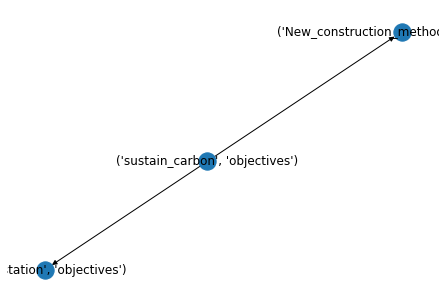

<Figure size 432x288 with 0 Axes>

In [182]:
e=nx.ego_graph(One_layer,('sustain_carbon', 'objectives'),1)
nx.draw(e,with_labels=True)
plt.show()
plt.clf()